In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import re
from collections import Counter

In [2]:
%matplotlib inline

In [3]:
ts = pd.read_csv('billtopsong.csv')

In [4]:
ts['artists'] = ts['artists'].map(lambda i: i.split(' Featuring')[0])
ts['artists'] = ts['artists'].map(lambda i: i.split(',')[0])
ts['artists'] = ts['artists'].map(lambda i: i.split(' &')[0])
ts['artists'] = ts['artists'].map(lambda i: i.split(' +')[0])
ts['artists'] = ts['artists'].map(lambda i: i.split('Jay Z ')[0])
ts['artists'] = ts['artists'].map(lambda x: re.sub('Jay[ ]+Z', 'Jay-Z', x))
counts = pd.DataFrame({'artists':ts.artists.value_counts().index, 'count':ts.artists.value_counts().values})
ts_count = pd.merge(ts, counts, on='artists', how='right')

In [37]:
counts_graph = counts.head(20)

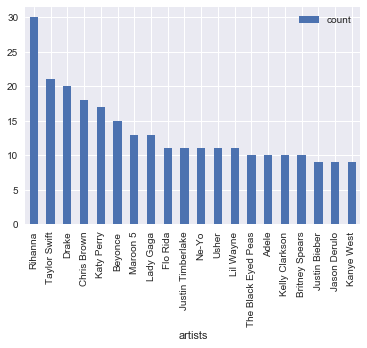

In [6]:
counts_graph.plot(x='artists', y='count', kind='bar')
plt.xticks(rotation='vertical')
plt.show()

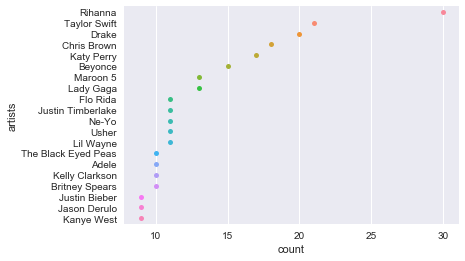

In [7]:
sns.stripplot(x="count", y="artists", data=counts_graph)

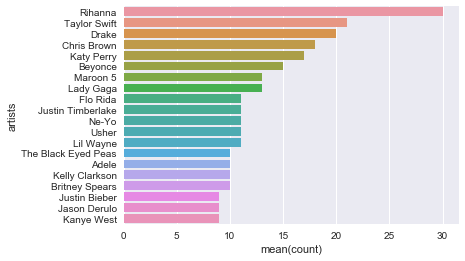

In [39]:
sns.barplot(x="count", y="artists", data=counts_graph)

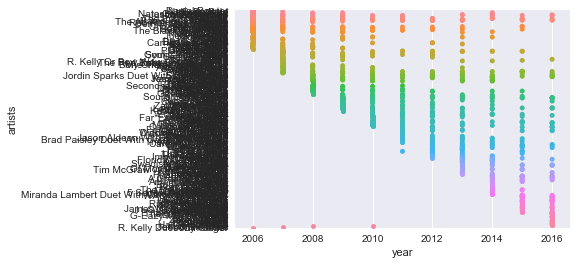

In [34]:
sns.swarmplot(x='year',y='artists',data=ts_count)

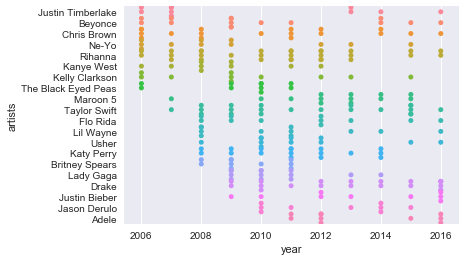

In [9]:
swarm = ts_count[ts_count['artists'].isin(counts_graph.artists)]
sns.swarmplot(x='year',y='artists',data=swarm)

In [28]:
top_artist = pd.read_csv('billtopar.csv')

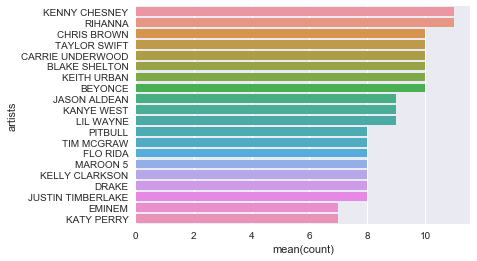

In [41]:
ta = pd.DataFrame({'artists':top_artist.artists.value_counts().index, 'count':top_artist.artists.value_counts().values})
ta_head = ta.head(20)
sns.barplot(x="count", y="artists", data=ta_head);

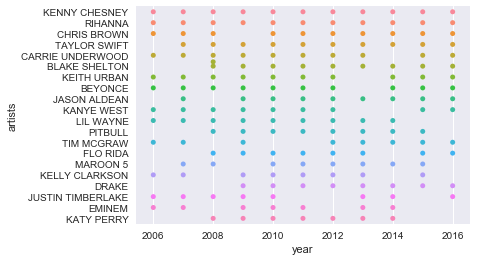

In [43]:
ta_count = pd.merge(ta, top_artist, on='artists', how='right')
swarm = ta_count[ta_count['artists'].isin(ta_head.artists)]
sns.swarmplot(x='year',y='artists',data=swarm)

In [76]:
all_time = pd.read_csv('billall.csv')
all_time = all_time.rename(columns={'name': 'artists'})

In [77]:
all_time_count = pd.merge(all_time, ta, on='artists', how='right')
all_time_count = all_time_count.head(25)

In [5]:
top_rap = pd.read_csv('billtoprap.csv')

In [6]:
top_rb = pd.read_csv('billtoprb.csv')

In [7]:
top_rock = pd.read_csv('billtoprock.csv')

In [8]:
top_country = pd.read_csv('billtopcountry.csv')

In [9]:
top_edm = pd.read_csv('billtopedm.csv')

In [302]:
singer_gender = pd.read_csv('singers_gender.csv',encoding='latin-1')
singer_gender = singer_gender.rename(columns={'artist': 'artists'})
singer_gender['artists'] = singer_gender['artists'].str.upper()

In [303]:
ts_count['artists'] = ts_count['artists'].str.upper()

In [319]:
a = singer_gender[singer_gender.artists.map(lambda x: re.match('SEAN*', x)!= None)]

In [318]:
join = pd.merge(ts_count, singer_gender, on='artists', how='left')

In [317]:
join.gender.isnull().sum()

396

In [5]:
#from os import path
#from wordcloud import WordCloud

In [7]:
#wordcloud = WordCloud().generate(ts['name'])